#Important Notes/Steps during ML workflows.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Adding an extra dimension to array.

In [2]:
X = np.linspace(0,10)
X.shape

(50,)

In [4]:
X = X[:,np.newaxis]

In [5]:
X.shape

(50, 1)

In [6]:
#This is important since the Feature Matrix must always be 2D.

# Validation Curves in SK-Learn.

> Important Learning : How to fit complex/high order polynomials in SK-Learn.

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [12]:
def PolyReg(degree=2, **kwargs):

  P = make_pipeline(PolynomialFeatures(degree),
                    LinearRegression(**kwargs))
  
  return P


def datamaker(N=20):

  X = np.random.rand(N,1)**2

  #ravel is flattening.
  y = 10 - 1/(X.ravel() + 0.1)

  return X,y


In [13]:
X_train , y_train = datamaker(100)

### Fitting Polynomials of Different Degrees.

In [14]:
#Let's go with three models. 
#Model 1 = Degree 1

m1 = PolyReg(1).fit(X_train, y_train)

#Model 2 = Degree 3
m3 = PolyReg(3).fit(X_train,y_train)

#Model 3 = Degree 5
m5 = PolyReg(5).fit(X_train,y_train)

In [32]:
#Test Data. 
X_test = np.linspace(0,1,100).reshape(100,1)

In [33]:
#Predictions



yp1 = m1.predict(X_test) 
yp3 = m3.predict(X_test)
yp5 = m5.predict(X_test)

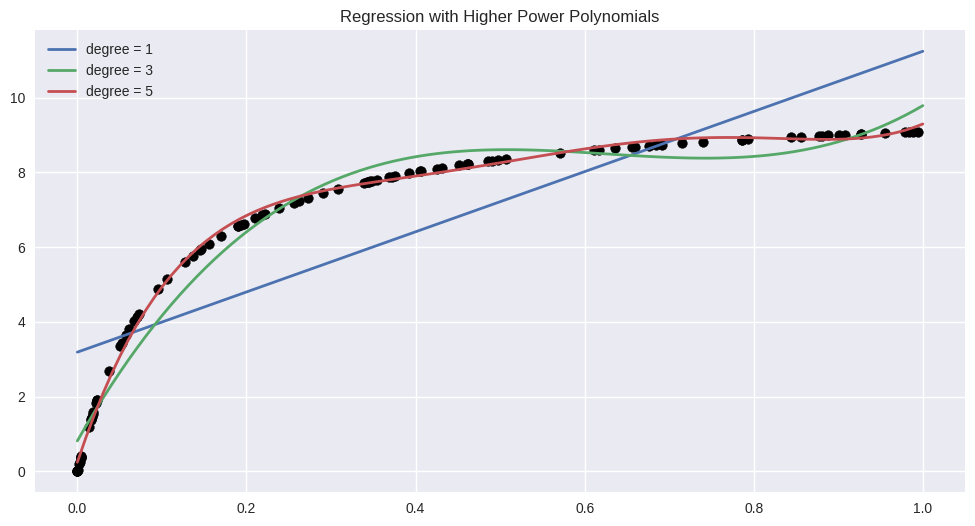

In [42]:
#Plotting
plt.figure(figsize=(12,6))
plt.style.use('seaborn')


plt.grid()
plt.scatter(X_train.ravel() , y_train, color='black')
plt.plot(X_test.ravel() , yp1 , lw=2, label='degree = 1')
plt.plot(X_test.ravel() , yp3 , lw=2, label='degree = 3')
plt.plot(X_test.ravel() , yp5 , lw=2, label='degree = 5')




plt.title('Regression with Higher Power Polynomials')
plt.legend()
plt.grid()